<a href="https://colab.research.google.com/github/Najmdeen/Customer-Churn/blob/main/Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Objective of the Project
In this project, we aim to address the following objectives:

#### 1. Dataset Understanding and Cleanup:

- We will first explore the dataset to understand its structure, types of variables, and any inconsistencies or missing values.
- Based on this initial analysis, we will perform necessary data cleanup activities.
#### 2. Building a Classification Model:

- Our primary goal is to build a machine learning model that can predict customer churn for an Anonymous Multinational Bank.
- We will use various classification algorithms and evaluate their performance.

#### 3. Hyperparameter Tuning and Model Comparison:

- We will fine-tune the hyperparameters of the classification models to optimize their performance.
- A comparison of the evaluation metrics across different classification algorithms will be conducted to select the best model.


Import Libraries

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

from sklearn.model_selection import GridSearchCV

### Step 1: Initial Dataset Exploration
Let's start by loading the dataset and taking a look at the first few rows.

In [2]:
# Load the dataset
df = pd.read_csv("/content/Customer-Churn-Records 2.csv")

# Display the first few rows of the dataset for initial exploration
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


### Step 2: Detailed Data Exploration and Cleanup
The next step involves a detailed exploration of the dataset to identify missing values, outliers, and the need for any data transformation. We will also decide which features are relevant for our analysis.

In [3]:
# Detailed exploration of the dataset

# Checking the shape of the dataset
df.shape

(10000, 18)

In [4]:
# Checking for missing values
missing_values = df.isnull().sum()
missing_values

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

In [6]:
# Basic statistics for numerical columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [9]:
# Checking data types of the columns
df.dtypes

RowNumber               int64
CustomerId              int64
Surname                object
CreditScore             int64
Geography              object
Gender                 object
Age                     int64
Tenure                  int64
Balance               float64
NumOfProducts           int64
HasCrCard               int64
IsActiveMember          int64
EstimatedSalary       float64
Exited                  int64
Complain                int64
Satisfaction Score      int64
Card Type              object
Point Earned            int64
dtype: object

### Step 3: Data Visualization Insights
let's perform some data visualization to gain more insights into the dataset. We can explore the following:

1. **Distribution of the Target Variable (Customer Churn):** To understand the balance between churned and retained customers.
2. **Correlation Heatmap:** To see the correlation between different numerical features.
3. **Age Distribution:** To understand the age distribution of the customers.
4. **Geographical Distribution:** To see the distribution of customers across different regions.
5. **Gender Distribution:** To observe the gender distribution among customers.

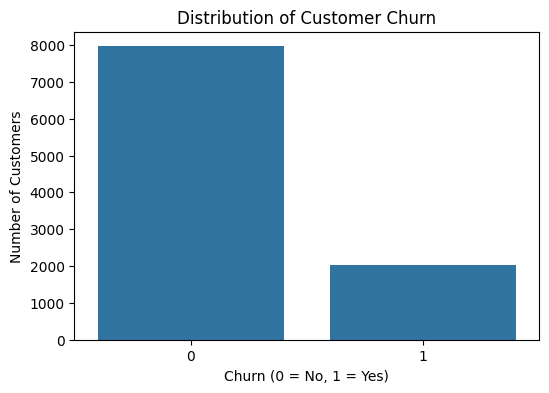

<ipython-input-14-0594d60ecc40>:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')


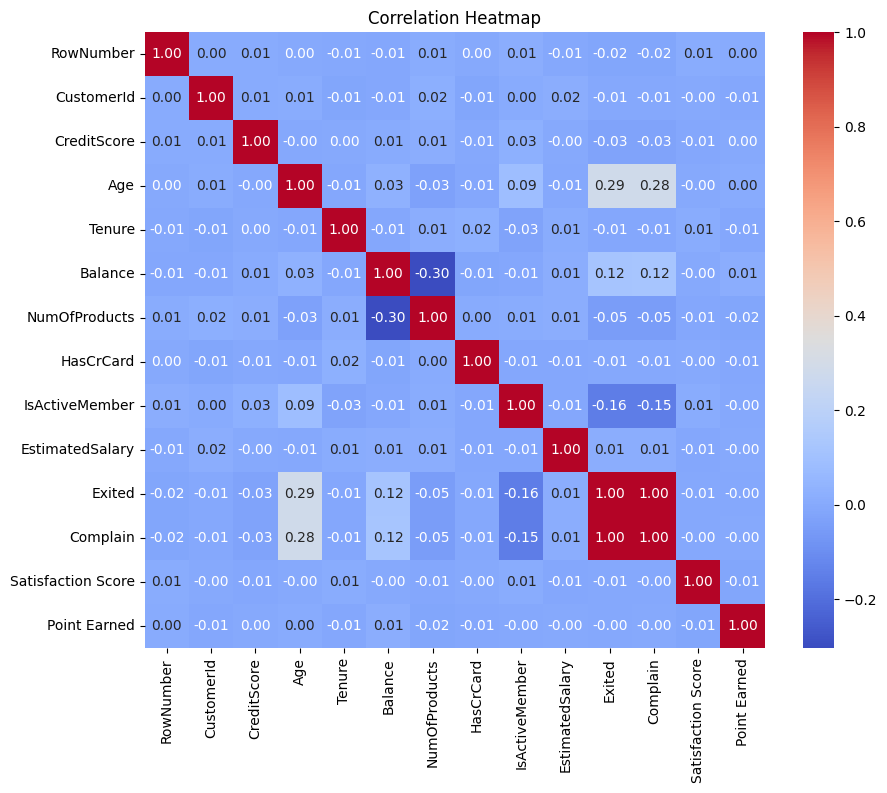

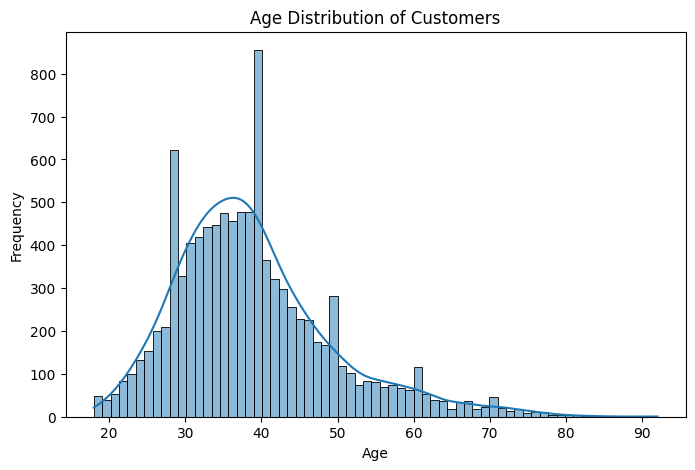

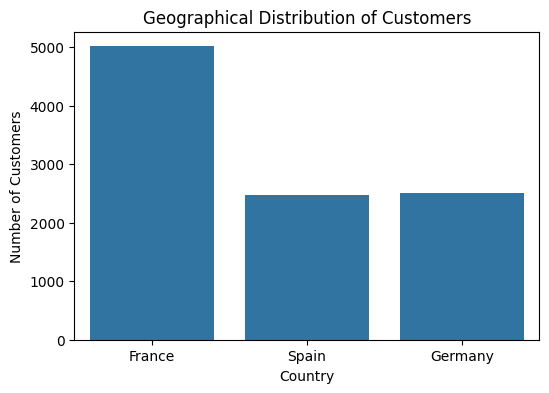

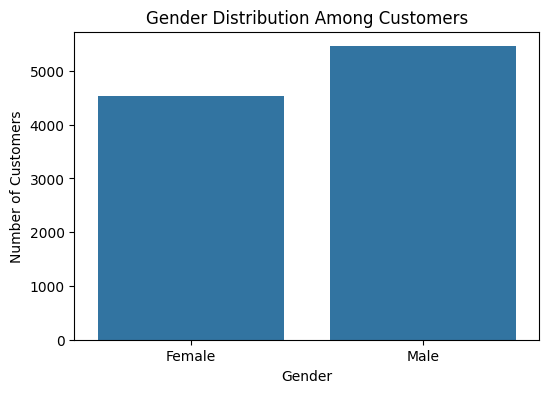

In [14]:


# Visualization 1: Distribution of the Target Variable (Customer Churn)
plt.figure(figsize=(6, 4))
sns.countplot(x='Exited', data=df)
plt.title('Distribution of Customer Churn')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Number of Customers')
plt.show()

# Visualization 2: Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Visualization 3: Age Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Visualization 4: Geographical Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Geography', data=df)
plt.title('Geographical Distribution of Customers')
plt.xlabel('Country')
plt.ylabel('Number of Customers')
plt.show()

# Visualization 5: Gender Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution Among Customers')
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.show()


### Step 4: Data Preprocessing
Given these findings, the next step is to preprocess the data. This includes:

- Encoding categorical variables.
- Normalizing/standardizing numerical variables if necessary.
- Dropping irrelevant features for the model (like RowNumber, CustomerId, Surname).
- Age Binning into 'Youth', 'Young Adult', 'Adult', and 'Senior'.

In [19]:
# Binning the age into categories
bins = [0, 18, 30, 54, 120]
labels = ['Youth', 'Young Adult', 'Adult', 'Senior']
df2 = df.copy()
df2['Age Group'] = pd.cut(df2['Age'], bins=bins, labels=labels, right=False)
df2.drop('Age', axis=1, inplace= True)  # Dropping the original 'Age' column

In [20]:
# Dropping irrelevant features
df_preprocessed = df2.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

# Identifying numerical and categorical columns
numerical_cols = df_preprocessed.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df_preprocessed.select_dtypes(include=['object']).columns

# Creating transformers for numerical and categorical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')), # Imputer is not strictly necessary here as we have no missing values
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), # Imputer is not strictly necessary here as we have no missing values
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combining transformers into a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Applying the transformations to the dataset
df_preprocessed = preprocessor.fit_transform(df_preprocessed)

# Check the shape of the preprocessed data
df_preprocessed.shape


(10000, 20)

### Step 5: Model Building and Evaluation
In this step, we'll proceed with the following tasks:

1. **Splitting the Data:** Divide the dataset into training and testing sets.
2. **Model Selection:** Choose a range of classification models for initial testing.
3. **Training the Models:** Train each model on the training set.
4. **Evaluating the Models:** Assess the performance of each model on the test set using appropriate metrics.
5. **Hyperparameter Tuning:** Fine-tune the best-performing models to improve their performance.
6. **Model Comparison:** Compare the final models based on their performance metrics.

Let's start by splitting the data

In [23]:
df2.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned,Age Group
0,1,15634602,Hargrave,619,France,Female,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464,Adult
1,2,15647311,Hill,608,Spain,Female,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456,Adult
2,3,15619304,Onio,502,France,Female,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377,Adult
3,4,15701354,Boni,699,France,Female,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350,Adult
4,5,15737888,Mitchell,850,Spain,Female,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425,Adult


In [29]:
X = df2.drop(['RowNumber', 'CustomerId', 'Surname','Exited'], axis=1)
y = df2['Exited']

# Splitting the dataset into training and testing sets again
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Columns to be used in preprocessing (excluding 'Exited')
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Updating the transformers in the ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Applying the transformations to the training and testing data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Checking the shapes of the processed datasets
X_train_processed.shape, X_test_processed.shape, y_train.shape, y_test.shape


((8000, 19), (2000, 19), (8000,), (2000,))

In [31]:
X.head()

,CreditScore,Geography,Gender,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Card Type,Point Earned,Age Group
0,619,France,Female,2,0.00,1,1,1,101348.88,1,2,DIAMOND,464,Adult
1,608,Spain,Female,1,83807.86,1,0,1,112542.58,1,3,DIAMOND,456,Adult
2,502,France,Female,8,159660.80,3,1,0,113931.57,1,3,DIAMOND,377,Adult
3,699,France,Female,1,0.00,2,0,0,93826.63,0,5,GOLD,350,Adult
4,850,Spain,Female,2,125510.82,1,1,1,79084.10,0,5,GOLD,425,Adult


#### Model training phase.
Here's the plan:

1. Select and Train Models: We will train several classification models on the training data. The models we'll consider include:
- Logistic Regression
- Decision Tree
- Random Forest
- Gradient Boosting

2. Evaluate Models: Each model will be evaluated based on its performance metrics (like accuracy, precision, recall, and F1-score) on the test data.

3. Model Comparison: We'll compare the models based on their evaluation metrics to determine the most effective one for predicting customer churn.



In [34]:
# Initializing the models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
}

# Dictionary to hold evaluation metrics for each model
model_metrics = {}

# Training and evaluating each model
for model_name, model in models.items():
    # Training the model
    model.fit(X_train_processed, y_train)

    # Making predictions on the testing set
    y_pred = model.predict(X_test_processed)
    y_proba = model.predict_proba(X_test_processed)[:, 1]

    # Calculating evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)

    # Storing the metrics
    model_metrics[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "ROC AUC": roc_auc
    }

# Displaying the metrics for each model
model_metrics_df = pd.DataFrame(model_metrics).T
model_metrics_df

,Accuracy,Precision,Recall,F1 Score,ROC AUC
Logistic Regression,0.9995,1.000000,0.997531,0.998764,0.999862
Decision Tree,0.9965,0.995025,0.987654,0.991326,0.993200
Random Forest,0.9995,1.000000,0.997531,0.998764,0.999111
Gradient Boosting,0.9990,0.997531,0.997531,0.997531,0.999652


### Step 6: Conclusion
#### Analysis and Recommendations:
1. **High Performance Across Models:** All four models show exceptionally high performance across all metrics. This is excellent but also raises the question of whether the dataset might be too easy to predict or if there are certain dominant features that are driving these predictions.

2. **Random Forest and Logistic Regression:** These models have the highest accuracy, precision, recall, and F1 scores, making them excellent candidates for predicting customer churn.

3. **Gradient Boosting:** Shows slightly lower metrics compared to Random Forest and Logistic Regression but still performs exceptionally well.

4. **Decision Tree:** Has the lowest performance among the four models, but the difference is marginal.

#### Next Steps:
Given these results, you can:

1. **Deploy one of the top-performing models (Random Forest or Logistic Regression) for predicting customer churn.**
2. **Investigate model interpretability:** To understand which features are most predictive of churn.
3. **Perform further analysis on the dataset:** To ensure that the models are not overfitting and to understand the drivers behind such high performance.


In [35]:
import joblib

# Extracting the Logistic Regression and Random Forest models from the dictionary
log_reg_model = models["Logistic Regression"]
rf_model = models["Random Forest"]

# Saving the Logistic Regression model
log_fname = 'logistic_regression_model.sav'
joblib.dump(log_reg_model, log_fname)

# Saving the Random Forest model
rf_fname = 'random_forest_model.sav'
joblib.dump(rf_model, rf_fname)

# Output the filenames
print(f"Logistic Regression model saved as {log_fname}")
print(f"Random Forest model saved as {rf_fname}")


Logistic Regression model saved as logistic_regression_model.sav
Random Forest model saved as random_forest_model.sav
